TIDAK DI SMOTE (DATA ASLI)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
import ast
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

data = pd.read_csv(r'F:\SKRIPSI\TA\Fix_code\SkripSHYs\FixedDataset\NonAugmented\PerclosEAR\output\PERCLOSready_resampled1.csv')

# Convert the columns from string representation of lists to actual lists of floats
def convert_to_float_list(column):
    return column.apply(lambda x: list(map(float, ast.literal_eval(x))))

data['PERCLOS'] = convert_to_float_list(data['PERCLOS'])
data['MAR_Std'] = convert_to_float_list(data['MAR_Std'])

# Combine the lists into a single feature matrix
X = np.hstack((np.array(data['PERCLOS'].tolist()), np.array(data['MAR_Std'].tolist())))
y = data['Class'].values


In [2]:
print(data.dtypes)

PERCLOS    object
MAR_Std    object
Class       int64
dtype: object


In [3]:
print(X)

[[0.04341893 0.04579772 0.03631795 ... 0.02739552 0.02141735 0.02616562]
 [0.04007385 0.09729903 0.05479942 ... 0.01899503 0.01977246 0.01517022]
 [0.04124125 0.0362592  0.05022096 ... 0.01572837 0.0138987  0.01706036]
 ...
 [0.04579672 0.11980366 0.0498365  ... 0.0194707  0.08069814 0.04081998]
 [0.0563034  0.12388152 0.05019779 ... 0.01784523 0.07037453 0.03578553]
 [0.04304045 0.10318755 0.05136933 ... 0.02088641 0.04121781 0.03648137]]


In [94]:
X_Train, X_Test,Y_Train,Y_Test = train_test_split(X, y, test_size=0.25, random_state=42)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_Train)
X_test = sc_X.transform(X_Test)


param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)

grid.fit(X_train, Y_Train)

print("Best parameters found: ", grid.best_params_)

y_pred = grid.predict(X_test)

# Evaluate the model
print("Classification Report:\n", accuracy_score(Y_Test, y_pred))
print("Accuracy: ", accuracy_score(Y_Test, y_pred))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.938 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.812 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.875 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.733 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.733 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.375 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf

In [4]:
import pickle
X_Train, X_Test,Y_Train,Y_Test = train_test_split(X, y, test_size=0.25, random_state=42)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_Train)
X_test = sc_X.transform(X_Test)
scaler = StandardScaler().fit(X_train)
# Save the scaler
with open('svmscaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [7]:
svm_classifier = SVC(kernel='rbf',gamma='auto' ,C=1, max_iter=1000)

# Fit the classifier to the training data
Svm_uye = svm_classifier.fit(X_train, Y_Train)

# You can now use X_train_scaled and X_test_scaled for training and testing your SVM model

# Example: Predicting using the trained model
y_pred = Svm_uye.predict(X_test)

# Evaluate the model (example using accuracy score)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_Test, y_pred) * 100
print(f'Accuracy: {accuracy}%')

Accuracy: 92.5925925925926%


In [8]:
filename_scaler = r'F:\SKRIPSI\TA\Fix_code\SkripSHYs\models\svm.pkl'
pickle.dump(Svm_uye, open(filename_scaler, 'wb'))

In [16]:
print (X)
print (X_Train)

[[0.04341893 0.04579772 0.03631795 ... 0.02739552 0.02141735 0.02616562]
 [0.04007385 0.09729903 0.05479942 ... 0.01899503 0.01977246 0.01517022]
 [0.04124125 0.0362592  0.05022096 ... 0.01572837 0.0138987  0.01706036]
 ...
 [0.05129879 0.07186484 0.06406456 ... 0.01567877 0.02077269 0.02701332]
 [0.16126993 0.07108502 0.07946958 ... 0.01252266 0.01610681 0.00743451]
 [0.16524089 0.07129977 0.07584468 ... 0.01583218 0.01648056 0.0077353 ]]
[[0.16891789 0.07072793 0.08008745 ... 0.01261534 0.01617027 0.00677975]
 [0.04284438 0.08818944 0.08365624 ... 0.01365269 0.01408636 0.00171242]
 [0.04229042 0.02523813 0.10139581 ... 0.01784941 0.01468296 0.01574596]
 ...
 [0.18165288 0.08131653 0.11200121 ... 0.01694979 0.01487942 0.01828822]
 [0.04147025 0.09651906 0.05161965 ... 0.02141332 0.02287329 0.0341611 ]
 [0.06014458 0.03162738 0.09477942 ... 0.01786409 0.01463764 0.01497251]]


In [9]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
cm = confusion_matrix(Y_Test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[8 0 1]
 [0 8 1]
 [0 0 9]]


In [10]:
report = classification_report(Y_Test, y_pred, output_dict=False)
print(report)

              precision    recall  f1-score   support

           1       1.00      0.89      0.94         9
           2       1.00      0.89      0.94         9
           3       0.82      1.00      0.90         9

    accuracy                           0.93        27
   macro avg       0.94      0.93      0.93        27
weighted avg       0.94      0.93      0.93        27



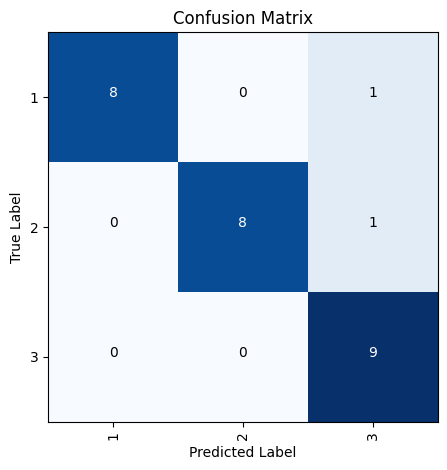

In [11]:
# Definisikan label kelas
import matplotlib.pyplot as plt
class_names = ['1',
                '2',
                '3'
              ]  # Nama kelas

# Tampilkan confusion matrix menggunakan matplotlib
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
# plt.colorbar()

# Atur label pada sumbu x dan y
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)

# Tulis nilai pada setiap sel confusion matrix
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

# Atur label pada sumbu x dan y
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Tampilkan plot confusion matrix
plt.tight_layout()
plt.show()

PREDIKSI TEST

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
import ast
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

data = pd.read_csv(r'F:\SKRIPSI\TA\Fix_code\SkripSHYs\FixedDataset\NonAugmented\test\output\PERCLOSready.csv')

# Convert the columns from string representation of lists to actual lists of floats
# def convert_to_float_list(column):
#     return column.apply(lambda x: list(map(float, ast.literal_eval(x))))

# data['PERCLOS'] = convert_to_float_list(data['PERCLOS'])
# data['MAR_Std'] = convert_to_float_list(data['MAR_Std'])

# Combine the lists into a single feature matrix
X = np.hstack((np.array(data['PERCLOS'].tolist()), np.array(data['MAR_Std'].tolist())))

In [14]:
import pandas as pd
import numpy as np
import pickle
import ast

# Function to convert string representation of list to a list of floats
def convert_to_float_list(column):
    return column.apply(lambda x: list(map(float, x.strip("[]").split(","))))

# Load the CSV data
csv_file_path = r'F:\SKRIPSI\TA\Fix_code\SkripSHYs\FixedDataset\NonAugmented\test\output\PERCLOSready.csv'
data = pd.read_csv(csv_file_path)

# Convert the columns containing list representations to actual lists of floats
data['PERCLOS'] = convert_to_float_list(data['PERCLOS'])
data['MAR_Std'] = convert_to_float_list(data['MAR_Std'])

# Combine the columns into a single NumPy array for testing
X = np.hstack((np.array(data['PERCLOS'].tolist()), np.array(data['MAR_Std'].tolist())))

# Load the saved scaler
with open(r'F:\SKRIPSI\TA\Fix_code\SkripSHYs\PERCLOS\svmscaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

print(f'Type of scaler: {type(scaler)}')
if not isinstance(scaler, StandardScaler):
    raise TypeError(f'Loaded object is not a StandardScaler, it is {type(scaler)}')

X_test = scaler.transform(X)

with open(r'F:\SKRIPSI\TA\Fix_code\skripSHYs\models\svm.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

y_pred = loaded_model.predict(X_test)

# Print predictions
print(y_pred)

# # Standardize the test data
# X_test = scaler.transform(X)

# # Load the trained model from the pickle file
# with open(r'F:\SKRIPSI\TA\Fix_code\skripSHYs\models\svm.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)

# # Use the loaded model to make predictions on the test data
# y_pred = loaded_model.predict(X_test)

# # Print predictions
# print(y_pred)


Type of scaler: <class 'sklearn.preprocessing._data.StandardScaler'>
[1 1]


.

.

.

COBA TRAINING UNTUK DATA YANG SUDAH DI SMOTE (SETELAH DISAMAKAN)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
import ast
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

data = pd.read_csv(r'F:\SKRIPSI\TA\Fix_code\SkripSHYs\FixedDataset\NonAugmented\PerclosEAR\output\PERCLOSready_resampled1.csv')

# Convert the columns from string representation of lists to actual lists of floats
def convert_to_float_list(column):
    return column.apply(lambda x: list(map(float, ast.literal_eval(x))))

data['PERCLOS'] = convert_to_float_list(data['PERCLOS'])
data['MAR_Std'] = convert_to_float_list(data['MAR_Std'])

# Combine the lists into a single feature matrix
X = np.hstack((np.array(data['PERCLOS'].tolist()), np.array(data['MAR_Std'].tolist())))
y = data['Class'].values


In [2]:
import pickle
X_Train, X_Test,Y_Train,Y_Test = train_test_split(X, y, test_size=0.25, random_state=42)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_Train)
X_test = sc_X.transform(X_Test)
scaler = StandardScaler().fit(X_train)
# Save the scaler
with open('svmscaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [3]:
svm_classifier = SVC(kernel='rbf',gamma='scale' ,C=1, max_iter=1000, probability=True)

# Fit the classifier to the training data
Svm_coba = svm_classifier.fit(X_train, Y_Train)

# You can now use X_train_scaled and X_test_scaled for training and testing your SVM model

# Example: Predicting using the trained model
y_pred = Svm_coba.predict(X_test)

# Evaluate the model (example using accuracy score)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_Test, y_pred) * 100
print(f'Accuracy: {accuracy}%')

Accuracy: 92.5925925925926%


In [4]:
filename_scaler = r'F:\SKRIPSI\TA\Fix_code\SkripSHYs\models\svmrbf.pkl'
pickle.dump(Svm_coba, open(filename_scaler, 'wb'))

In [5]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
cm = confusion_matrix(Y_Test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[8 0 1]
 [0 8 1]
 [0 0 9]]


In [6]:
report = classification_report(Y_Test, y_pred, output_dict=False)
print(report)

              precision    recall  f1-score   support

           1       1.00      0.89      0.94         9
           2       1.00      0.89      0.94         9
           3       0.82      1.00      0.90         9

    accuracy                           0.93        27
   macro avg       0.94      0.93      0.93        27
weighted avg       0.94      0.93      0.93        27



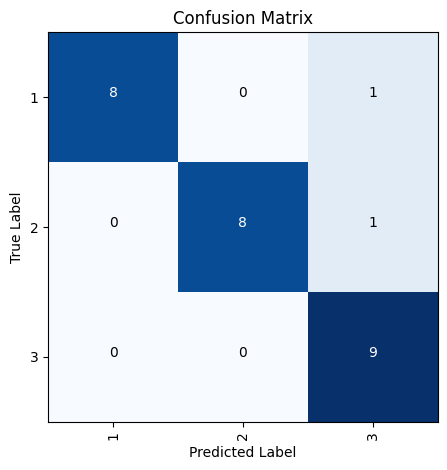

In [7]:
# Definisikan label kelas
import matplotlib.pyplot as plt
class_names = ['1',
                '2',
                '3'
              ]  # Nama kelas

# Tampilkan confusion matrix menggunakan matplotlib
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
# plt.colorbar()

# Atur label pada sumbu x dan y
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)

# Tulis nilai pada setiap sel confusion matrix
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

# Atur label pada sumbu x dan y
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Tampilkan plot confusion matrix
plt.tight_layout()
plt.show()

In [13]:
import pandas as pd
import numpy as np
import pickle
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Function to convert string representation of list to a list of floats
def convert_to_float_list(column):
    return column.apply(lambda x: list(map(float, x.strip("[]").split(","))))

# Load the CSV data
csv_file_path = r'F:\SKRIPSI\TA\Fix_code\SkripSHYs\FixedDataset\NonAugmented\test\output\PERCLOSready.csv'
data = pd.read_csv(csv_file_path)

# Convert the columns containing list representations to actual lists of floats
data['PERCLOS'] = convert_to_float_list(data['PERCLOS'])
data['MAR_Std'] = convert_to_float_list(data['MAR_Std'])

# Combine the columns into a single NumPy array for testing
X_true = np.hstack((np.array(data['PERCLOS'].tolist()), np.array(data['MAR_Std'].tolist())))
Y_true = data['Class'].values


# Load the saved scaler
with open(r'F:\SKRIPSI\TA\Fix_code\SkripSHYs\PERCLOS\svmscaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

print(f'Type of scaler: {type(scaler)}')
if not isinstance(scaler, StandardScaler):
    raise TypeError(f'Loaded object is not a StandardScaler, it is {type(scaler)}')

X_test = scaler.transform(X_true)

with open(r'F:\SKRIPSI\TA\Fix_code\skripSHYs\models\svm.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

y_pred = loaded_model.predict(X_test)
y_prob = loaded_model.predict_proba(X_test)

print(y_pred)
print(y_prob)

# Generate classification report
report = classification_report(Y_true, y_pred)
print(report)

# Create a DataFrame for the results
results_df = pd.DataFrame(y_prob, columns=[f'Prob_Class_{i+1}' for i in range(y_prob.shape[1])])
results_df['True_Label'] = Y_true
results_df['Predicted_Label'] = y_pred

# Display the results
print(results_df.head())

# Save the results to a CSV file
results_df.to_csv('svm_prediction_probabilities.csv', index=False)


Type of scaler: <class 'sklearn.preprocessing._data.StandardScaler'>
[1]
[[0.45697597 0.43159104 0.11143299]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

   Prob_Class_1  Prob_Class_2  Prob_Class_3  True_Label  Predicted_Label
0      0.456976      0.431591      0.111433           1                1


In [ ]:
y_true = test_data['True_Labels']

In [ ]:
report = classification_report(y_true, y_pred)
print(report)